In [1]:
# This is the code for cleaning the NBA data
#The clean data is returned in the file "NBA_clean.csv"

In [2]:
import os
import csv
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#====================================================================================================
#=======================Building Dataset for yearly salaries with Player name as Key=================
#====================================================================================================
historic_bball = os.path.join("nba_salaries_1990_to_2018.csv")

# Set empty list variables
Player= []
Salary = []
Season = []

  #Open current NBA CSV to zip important Values into a df
with open(historic_bball, 'r') as csvFile:                    

   csvReader = csv.reader(csvFile, delimiter=',')

   # Skipp headers
   next(csvReader, None)                                      

   for row in csvReader:

       # Append data from the row
       Player.append(row[0])
       Salary.append(row[1])
       Season.append(row[2])
    
# Zip lists together
cleanCSV = list(zip(Player, Salary, Season))
#cleanCSV                        #Returns raw data for processing into dataframe             


In [4]:
df = pd.DataFrame(cleanCSV)              # Creating dataframe for
df.columns=['Player','Salary','Season']  #changing column name
df.head()
#df.count

,Player,Salary,Season
0,Kent Bazemore,16910113,2018
1,Dennis Schroder,15500000,2018
2,Miles Plumlee,12500000,2018
3,Jamal Crawford,10942762,2018
4,Marco Belinelli,6606060,2018


In [5]:
#====================================================================================================
#==================Building Dataset for Current Players Ages with Player name as Key=================
#====================================================================================================

bball_age = os.path.join("Age_player.csv")

# Set empty list variables
Player= []
Age2018 = []

# Open current NBA CSV to zip important Values into a df
with open(bball_age, 'r') as csvFile:
   csvReader = csv.reader(csvFile, delimiter=',')

   # Skipp headers
   next(csvReader, None)

   for row in csvReader:

       # Append data from the row
       Player.append(row[0])
       Age2018.append(row[1])

       
# Zip lists together
AgeCSV = list(zip(Player, Age2018))
#AgeCSV


In [6]:
playerAge_df = pd.DataFrame(AgeCSV)
playerAge_df.columns=['Player','Age']  #changing column name
#playerAge_df.describe
playerAge_df.head()                    #Returns AGE vs Player name DF                           

,Player,Age
0,Kent Bazemore,28
1,Dennis Schroder,24
2,Miles Plumlee,29
3,Dewayne Dedmon,28
4,Mike Muscala,26


In [7]:
drop_df= df.drop_duplicates(['Player', 'Season'])    # Needed to drop players with duplicate salaries forthe same season
df=drop_df

In [8]:
#====================================================================================================
#====================Pivot Table used to view dataset================================================
#=====================Not Needed, but I wanted to look at the dataset================================
#====================================================================================================

pivot_df=df.pivot(index="Player", columns="Season", values="Salary")
pivot_df

Season,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Player,,,,,,,,,,,,,,,,,,
A.C. Green,2250000,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
A.J. Guyton,316969,465850,18748,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
A.J. Hammons,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,650000,1312611
A.J. Price,None,None,None,None,None,None,None,None,None,457588,762195,854389,885120,None,62552,None,None,None
Aaron Brooks,None,None,None,None,None,None,None,None,1045560,1118520,None,None,3250000,1027424,None,2000000,2700000,2116955
Aaron Craft,None,None,None,None,None,None,None,None,None,None,None,None,None,None,35000,None,None,None
Aaron Gordon,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3992040,4171680,4351320,5504420
Aaron Gray,None,None,None,None,None,None,None,427163,711517,1000497,1028840,2500000,2575000,2690875,1227985,452059,452059,452059
Aaron Harrison,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,525093,375579,None


In [9]:
#NOT NEEDED, BUT WANTED
#=====================================================================================================
unique = df["Season"].unique()                         # Just showing the number years in my raw data
unique
#=====================================================================================================

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001'], dtype=object)

In [10]:
Dwight= df.loc[df["Player"] == "Dwight Howard"]         # I want to check the salary of a player over all the years to verify that my merged dataframes are putting data in the correct location
Jarrett= df.loc[df["Player"] == "Jarrett Jack"]         # I want to check the salary of a player over all the years to verify that my merged dataframes are putting data in the correct location


In [11]:
#===========================================================================================================
#============================The Next few cells created the dataframes for the yearly salaries==============
#===========================================================================================================

In [12]:
df2018= df.loc[df["Season"] == "2018"]
df2018= df2018.iloc[:,[0,1]]
df2018.head()

,Player,Salary
0,Kent Bazemore,16910113
1,Dennis Schroder,15500000
2,Miles Plumlee,12500000
3,Jamal Crawford,10942762
4,Marco Belinelli,6606060


In [13]:
df2017= df.loc[df["Season"] == "2017"]
df2017= df2017.iloc[:,[0,1]]
#df2017.head()
#df2017.reset_index

In [14]:
df2016= df.loc[df["Season"] == "2016"]
df2016= df2016.iloc[:,[0,1]]


In [15]:
df2015= df.loc[df["Season"] == "2015"]
df2015= df2015.iloc[:,[0,1]]
#df2015.head()


In [16]:
#===========================2014===========================================
#===========================================================================
df2014= df.loc[df["Season"] == "2014"]
df2014= df2014.iloc[:,[0,1]]
df2014.head()

#===========================2013===========================================
#===========================================================================
df2013= df.loc[df["Season"] == "2013"]
df2013= df2013.iloc[:,[0,1]]
df2013.head()

#===========================2012===========================================
#===========================================================================
df2012= df.loc[df["Season"] == "2012"]
df2012= df2012.iloc[:,[0,1]]
df2012.head()

#===========================2011===========================================
#===========================================================================
df2011= df.loc[df["Season"] == "2011"]
df2011= df2011.iloc[:,[0,1]]
df2011.head()

#===========================2010===========================================
#===========================================================================
df2010= df.loc[df["Season"] == "2010"]
df2010= df2010.iloc[:,[0,1]]
df2010.head()

#===========================2009===========================================
#===========================================================================
df2009= df.loc[df["Season"] == "2009"]
df2009= df2009.iloc[:,[0,1]]
df2009.head()

#===========================2008===========================================
#===========================================================================
df2008= df.loc[df["Season"] == "2008"]
df2008= df2008.iloc[:,[0,1]]
df2008.head()

#===========================2007===========================================
#===========================================================================
df2007= df.loc[df["Season"] == "2007"]
df2007= df2007.iloc[:,[0,1]]
df2007.head()

#===========================2006===========================================
#===========================================================================
df2006= df.loc[df["Season"] == "2006"]
df2006= df2006.iloc[:,[0,1]]
df2006.head()

#===========================2005===========================================#
#===========================================================================
df2005= df.loc[df["Season"] == "2005"]
df2005= df2005.iloc[:,[0,1]]
df2005.head()

#===========================2004===========================================
#===========================================================================
df2004= df.loc[df["Season"] == "2004"]
df2004= df2004.iloc[:,[0,1]]
df2004.head()

#===========================2003===========================================
#===========================================================================
df2003= df.loc[df["Season"] == "2003"]
df2003= df2003.iloc[:,[0,1]]
df2003.head()

#===========================2002===========================================
#===========================================================================
df2002= df.loc[df["Season"] == "2002"]
df2002= df2002.iloc[:,[0,1]]
df2002.head()

#===========================2001===========================================
#===========================================================================
df2001= df.loc[df["Season"] == "2001"]
df2001= df2001.iloc[:,[0,1]]
df2001.head()

#===========================2000===========================================
#===========================================================================
df2000= df.loc[df["Season"] == "2000"]
df2000= df2000.iloc[:,[0,1]]
df2000.head()

#df2001.head()

,Player,Salary


In [17]:
#=============================MERGING OF THE DATASETS JUST CREATED FOR SALARY VS YEARS===============
#====================================================================================================

Compiled_df = df2018.merge(df2017, how='left', left_on="Player", right_on='Player',suffixes=('_2018','_2017')).fillna(0)   #Left Merge Command. Left merges does not delete data
Compiled_df = Compiled_df.merge(df2016, how='left', left_on="Player", right_on='Player',suffixes=('','_2016')).fillna(0)   #Left Merge Command. Left merges does not delete data
Compiled_df = Compiled_df.merge(df2015, how='left', left_on="Player", right_on='Player',suffixes=('','_2015')).fillna(0)
Compiled_df = Compiled_df.merge(df2014, how='left', left_on="Player", right_on='Player',suffixes=('','_2014')).fillna(0)
Compiled_df = Compiled_df.merge(df2013, how='left', left_on="Player", right_on='Player',suffixes=('','_2013')).fillna(0)
Compiled_df = Compiled_df.merge(df2012, how='left', left_on="Player", right_on='Player',suffixes=('','_2012')).fillna(0)
Compiled_df = Compiled_df.merge(df2011, how='left', left_on="Player", right_on='Player',suffixes=('','_2011')).fillna(0)
Compiled_df = Compiled_df.merge(df2010, how='left', left_on="Player", right_on='Player',suffixes=('','_2010')).fillna(0)
Compiled_df = Compiled_df.merge(df2009, how='left', left_on="Player", right_on='Player',suffixes=('','_2009')).fillna(0)
Compiled_df = Compiled_df.merge(df2008, how='left', left_on="Player", right_on='Player',suffixes=('','_2008')).fillna(0)
Compiled_df = Compiled_df.merge(df2007, how='left', left_on="Player", right_on='Player',suffixes=('','_2007')).fillna(0)
Compiled_df = Compiled_df.merge(df2006, how='left', left_on="Player", right_on='Player',suffixes=('','_2006')).fillna(0)
Compiled_df = Compiled_df.merge(df2005, how='left', left_on="Player", right_on='Player',suffixes=('','_2005')).fillna(0)
Compiled_df = Compiled_df.merge(df2004, how='left', left_on="Player", right_on='Player',suffixes=('','_2004')).fillna(0)
Compiled_df = Compiled_df.merge(df2003, how='left', left_on="Player", right_on='Player',suffixes=('','_2003')).fillna(0)
Compiled_df = Compiled_df.merge(df2002, how='left', left_on="Player", right_on='Player',suffixes=('','_2002')).fillna(0)
Compiled_df = Compiled_df.merge(df2001, how='left', left_on="Player", right_on='Player',suffixes=('','_2001')).fillna(0)
Compiled_df = Compiled_df.merge(df2000, how='left', left_on="Player", right_on='Player',suffixes=('','_2000')).fillna(0)


new_col=['Player','2018', '2017', '2016', '2015', '2014', '2013', '2012',
        '2011', '2010', '2009', '2008', '2007', '2006', '2005', 
        '2004', '2003', '2002', '2001', '2000']
                                 
Compiled_df.columns = new_col
#Compiled_df


In [18]:
#Compiled_df.to_csv("NBA_clean.csv", encoding="utf-8", index=False, header=True)
#Compiled_df.head()
#len(Compiled_df.index)

In [19]:
#====================================================================================================
#==================Creating final Dataframe with a Merge Function====================================
#=====Function conveniently deletes rows with index values that are not shared by both dataframes====
#====================================================================================================


Compiled_df = pd.merge(playerAge_df, Compiled_df, on="Player")

In [20]:
drop2_df= Compiled_df.drop_duplicates(['Player', 'Age']) # Needed to drop players with duplicate salaries forthe same season



In [21]:
Compiled_df=drop2_df                                      #Moving final dataframe into global function

In [22]:
# Push the remade DataFrame to a new CSV file
Compiled_df.to_csv("NBA_clean.csv", encoding="utf-8", index=False, header=True)
len(Compiled_df.index)
Compiled_df.dtypes

Player    object
Age       object
2018      object
2017      object
2016      object
2015      object
2014      object
2013      object
2012      object
2011      object
2010      object
2009      object
2008      object
2007      object
2006      object
2005      object
2004      object
2003      object
2002      object
2001      object
2000       int64
dtype: object

In [23]:
#END


In [24]:
#In order for the zeros not to ruin my mean calculations, I will turn thing into 'nan' and use numppy to filter out
Compiled_df[Compiled_df==0]=np.nan

In [25]:
#utilizing the data frames that give me age and player names
playerAge_df.head()
playerAge_df.columns=['Player','Age'] 

In [26]:
# The follow will show Weekly Income Aves per Year

Compiled_df["2018"] = pd.to_numeric(Compiled_df["2018"])
Compiled_df["2017"] = pd.to_numeric(Compiled_df["2017"])
Compiled_df["2016"] = pd.to_numeric(Compiled_df["2016"])
Compiled_df["2015"] = pd.to_numeric(Compiled_df["2015"])
Compiled_df["2014"] = pd.to_numeric(Compiled_df["2014"])
Compiled_df["2013"] = pd.to_numeric(Compiled_df["2013"])
Compiled_df["2012"] = pd.to_numeric(Compiled_df["2012"])
Compiled_df["2011"] = pd.to_numeric(Compiled_df["2011"])
Compiled_df["2010"] = pd.to_numeric(Compiled_df["2010"])
Compiled_df["2009"] = pd.to_numeric(Compiled_df["2009"])
Compiled_df["2008"] = pd.to_numeric(Compiled_df["2008"])
Compiled_df["2007"] = pd.to_numeric(Compiled_df["2007"])
Compiled_df["2006"] = pd.to_numeric(Compiled_df["2006"])
Compiled_df["2005"] = pd.to_numeric(Compiled_df["2005"])
Compiled_df["2004"] = pd.to_numeric(Compiled_df["2004"])
Compiled_df["2003"] = pd.to_numeric(Compiled_df["2003"])
Compiled_df["2002"] = pd.to_numeric(Compiled_df["2002"])
Compiled_df["2001"] = pd.to_numeric(Compiled_df["2001"])


In [27]:
Ave_2018 = Compiled_df['2018'].mean()
Ave_2017 = Compiled_df['2017'].mean()
Ave_2016 = Compiled_df['2016'].mean()
Ave_2015 = Compiled_df['2015'].mean()
Ave_2014 = Compiled_df['2014'].mean()
Ave_2013 = Compiled_df['2013'].mean()
Ave_2012 = Compiled_df['2012'].mean()
Ave_2011 = Compiled_df['2011'].mean()
Ave_2010 = Compiled_df['2010'].mean()
Ave_2009 = Compiled_df['2009'].mean()
Ave_2008 = Compiled_df['2008'].mean()
Ave_2007 = Compiled_df['2007'].mean()
Ave_2006 = Compiled_df['2006'].mean()
Ave_2005 = Compiled_df['2005'].mean()
Ave_2004 = Compiled_df['2004'].mean()
Ave_2003 = Compiled_df['2003'].mean()
Ave_2002 = Compiled_df['2002'].mean()
Ave_2001 = Compiled_df['2001'].mean()

max_2001 = Compiled_df['2001'].max()
max_2001
in_2001=Compiled_df['2001'].mean()
in_2001

4169891.4285714286

In [28]:
Year=[2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 
      2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001]
       

Ave_income =[Ave_2018, Ave_2017,Ave_2016,Ave_2015,Ave_2014,Ave_2013,Ave_2012,Ave_2011,Ave_2010,Ave_2009,
             Ave_2008,Ave_2007,Ave_2006,Ave_2005,Ave_2004,Ave_2003, Ave_2002,Ave_2001]


# This code give me Average income per week using a for statement
    #through my average yearly income df
    
TotWeeks=52
Ave_W_Income=[]
for x in Ave_income:
    Ave_W_Income.append(x/TotWeeks)
Ave_income=Ave_W_Income

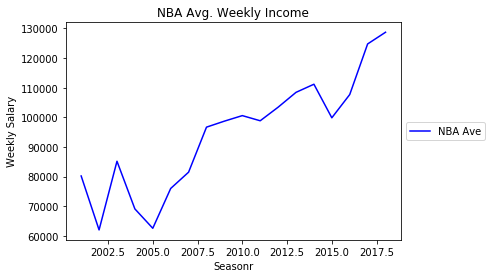

In [29]:
plt.plot(Year, Ave_income, color='blue', label="NBA Ave")
plt.title("NBA Avg. Weekly Income")
plt.xlabel("Seasonr")
plt.ylabel("Weekly Salary") 
#plt.figure(figsize=(10,6))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.savefig("NBA Yearly Salary Analysis")
plt.show()

In [30]:
#===================================================================================================
#Age vs income chart code follows
#===================================================================================================

Compiled_df["Age"] = pd.to_numeric(Compiled_df["Age"], errors='coerce').fillna(0).astype(np.int64) #Age came in as an object and i need it in a numerical format
Compiled_df.head()

,Player,Age,2018,2017,2016,2015,2014,2013,2012,2011,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Kent Bazemore,28,16910113,15730338.0,2000000.0,2000000.0,788872.0,473604.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dennis Schroder,24,15500000,2708582.0,1763400.0,1690680.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Miles Plumlee,29,12500000,12500000.0,2109294.0,1169880.0,1121520.0,1073280.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dewayne Dedmon,28,6000000,2898000.0,947278.0,816482.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mike Muscala,26,5000000,1015696.0,947276.0,816482.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:

Age_Track_df = Compiled_df["Age"]
Aged_Track_df= pd.DataFrame(Age_Track_df)  
Aged_Track_df.columns=['2018']
Aged_Track_df.head()
Aged_Track_df['2017']=Aged_Track_df.apply(lambda x: x-1)
Aged_Track_df['2016']=Aged_Track_df['2017'].apply(lambda x: x-1)
Aged_Track_df['2015']=Aged_Track_df['2016'].apply(lambda x: x-1)
Aged_Track_df['2014']=Aged_Track_df['2015'].apply(lambda x: x-1)
Aged_Track_df['2013']=Aged_Track_df['2014'].apply(lambda x: x-1)
Aged_Track_df['2012']=Aged_Track_df['2013'].apply(lambda x: x-1)
Aged_Track_df['2011']=Aged_Track_df['2012'].apply(lambda x: x-1)
Aged_Track_df['2010']=Aged_Track_df['2011'].apply(lambda x: x-1)
Aged_Track_df['2009']=Aged_Track_df['2010'].apply(lambda x: x-1)
Aged_Track_df['2008']=Aged_Track_df['2009'].apply(lambda x: x-1)
Aged_Track_df['2007']=Aged_Track_df['2008'].apply(lambda x: x-1)
Aged_Track_df['2006']=Aged_Track_df['2007'].apply(lambda x: x-1)
Aged_Track_df['2005']=Aged_Track_df['2006'].apply(lambda x: x-1)
Aged_Track_df['2004']=Aged_Track_df['2005'].apply(lambda x: x-1)
Aged_Track_df['2003']=Aged_Track_df['2004'].apply(lambda x: x-1)
Aged_Track_df['2002']=Aged_Track_df['2003'].apply(lambda x: x-1)
Aged_Track_df['2001']=Aged_Track_df['2002'].apply(lambda x: x-1)
Aged_Track_df['2000']=Aged_Track_df['2001'].apply(lambda x: x-1)
Aged_Track_df.head()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10
1,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6
2,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11
3,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10
4,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8


In [32]:
#=====================================================================================================================
#returns only the lines i need and most importantly used a lambda function to calculate age of players that season===
#====================================================================================================================

AvI2018= Compiled_df.iloc[:,[0,1]]

AvI2017= Compiled_df.iloc[:,[0,2]]
AvI2017=AvI2017.apply(lambda x: x-1) 

AvI2016= Compiled_df.iloc[:,[0,3]]
AvI2016=AvI2016.apply(lambda x: x-2)

AvI2015= Compiled_df.iloc[:,[0,4]]
AvI2015=AvI2015.apply(lambda x: x-3)

AvI2014= Compiled_df.iloc[:,[0,5]]
AvI2014=AvI2014.apply(lambda x: x-4)

AvI2013= Compiled_df.iloc[:,[0,6]]
AvI2013=AvI2013.apply(lambda x: x-5)

AvI2012= Compiled_df.iloc[:,[0,7]]
AvI2012=AvI2012.apply(lambda x: x-6)
AvI2011= Compiled_df.iloc[:,[0,8]]
AvI2011=AvI2011.apply(lambda x: x-7)
AvI2010= Compiled_df.iloc[:,[0,9]]
AvI2010=AvI2010.apply(lambda x: x-8)
AvI2009= Compiled_df.iloc[:,[0,10]]
AvI2009=AvI2009.apply(lambda x: x-9)
AvI2008= Compiled_df.iloc[:,[0,11]]
AvI2008=AvI2018.apply(lambda x: x-10)

AvI2007= Compiled_df.iloc[:,[0,12]]
AvI2007=AvI2007.apply(lambda x: x-11)

AvI2006= Compiled_df.iloc[:,[0,13]]
AvI2006=AvI2006.apply(lambda x: x-12)
AvI2005= Compiled_df.iloc[:,[0,14]]
AvI2005=AvI2005.apply(lambda x: x-13)
AvI2004= Compiled_df.iloc[:,[0,15]]
AvI2004=AvI2004.apply(lambda x: x-14)
AvI2003= Compiled_df.iloc[:,[0,16]]
AvI2003=AvI2003.apply(lambda x: x-15)
AvI2002= Compiled_df.iloc[:,[0,17]]
AvI2002=AvI2002.apply(lambda x: x-16)




TypeError: ("unsupported operand type(s) for -: 'str' and 'int'", 'occurred at index Player')

In [ ]:
#===================================================================================================
#================Binning==========================================================================
#===================================================================================================

bins = [17, 24, 34 , 44, 55]                                            # Create the bins in which Data will be held 
group_names = ['Ages 18-24', 'Ages 25-34', 'Ages 35-44', '45+ Years']  # Create the names for the for bins  

AvI2018["Age Groups"] = pd.cut(AvI2018["Age"], bins, labels=group_names) #Cut chart into bens

AvI2017["Age Groups"] = pd.cut(AvI2017["Age"], bins, labels=group_names) #Cut chart into bens

AvI2016["Age Groups"] = pd.cut(AvI2016["Age"], bins, labels=group_names) #Cut chart into bens
AvI2015["Age Groups"] = pd.cut(AvI2015["Age"], bins, labels=group_names) #Cut chart into bens
AvI2014["Age Groups"] = pd.cut(AvI2014["Age"], bins, labels=group_names) #Cut chart into bens

AvI2013["Age Groups"] = pd.cut(AvI2013["Age"], bins, labels=group_names) #Cut chart into bens
AvI2012["Age Groups"] = pd.cut(AvI2012["Age"], bins, labels=group_names) #Cut chart into bens
AvI2011["Age Groups"] = pd.cut(AvI2011["Age"], bins, labels=group_names) #Cut chart into bens
AvI2010["Age Groups"] = pd.cut(AvI2010["Age"], bins, labels=group_names) #Cut chart into bens
AvI2009["Age Groups"] = pd.cut(AvI2009["Age"], bins, labels=group_names) #Cut chart into bens
AvI2008["Age Groups"] = pd.cut(AvI2008["Age"], bins, labels=group_names) #Cut chart into bens

In [ ]:
#===================================================================================================
#The following seperates the take the mean of my data sets prior to me building a final large dataset
#===================================================================================================
Tw_18= AvI2018.groupby("Age Groups").mean()
Tw_18= Tw_18.reset_index()
Tw_17= AvI2017.groupby("Age Groups").mean()
Tw_17= Tw_17.reset_index()
Tw_16= AvI2016.groupby("Age Groups").mean()
Tw_16= Tw_16.reset_index()
Tw_15= AvI2015.groupby("Age Groups").mean()
Tw_15= Tw_15.reset_index()
Tw_14= AvI2014.groupby("Age Groups").mean()
Tw_14= Tw_14.reset_index()
Tw_13= AvI2013.groupby("Age Groups").mean()
Tw_13= Tw_13.reset_index()
Tw_12= AvI2012.groupby("Age Groups").mean()
Tw_12= Tw_12.reset_index()
Tw_11= AvI2011.groupby("Age Groups").mean()
Tw_11= Tw_11.reset_index()
Tw_10= AvI2010.groupby("Age Groups").mean()
Tw_10= Tw_10.reset_index()
Tw_09= AvI2009.groupby("Age Groups").mean()
Tw_09= Tw_09.reset_index()
Tw_08= AvI2008.groupby("Age Groups").mean()#["{0:,}".format]
Tw_08= Tw_08.reset_index()



Tw_08

In [ ]:
chart = Tw_18.merge(Tw_17, how='left', on="Age Groups")#, right_on='Player',suffixes=('_2018','_2017')).fillna(0)
chart = chart.merge(Tw_16, how='left', on="Age Groups")#, right_on='Player',suffixes=('_2018','_2017')).fillna(0)
chart = chart.merge(Tw_15, how='left', on="Age Groups")#, right_on='Player',suffixes=('_2018','_2017')).fillna(0)
chart = chart.merge(Tw_14, how='left', on="Age Groups")#, right_on='Player',suffixes=('_2018','_2017')).fillna(0)
chart = chart.merge(Tw_13, how='left', on="Age Groups")#, right_on='Player',suffixes=('_2018','_2017')).fillna(0)
chart = chart.merge(Tw_12, how='left', on="Age Groups")#, right_on='Player',suffixes=('_2018','_2017')).fillna(0)
chart = chart.merge(Tw_11, how='left', on="Age Groups")#, right_on='Player',suffixes=('_2018','_2017')).fillna(0)
chart = chart.merge(Tw_10, how='left', on="Age Groups")#, right_on='Player',suffixes=('_2018','_2017')).fillna(0)
chart = chart.merge(Tw_09, how='left', on="Age Groups")#, right_on='Player',suffixes=('_2018','_2017')).fillna(0)
chart = chart.merge(Tw_08, how='left', on="Age Groups")#, right_on='Player',suffixes=('_2018','_2017')).fillna(0)
chart=chart.rename(columns={'2018_x':'2018'})
chart=chart.iloc[:,[0,2,4,6,8,10,12,14,16,18,20]]

chart

In [ ]:
chart1=chart.transpose() # the chart format needed to be changed

In [ ]:
chart1.columns = chart1.iloc[0]  #Copy what i want as my index value to index
chart1

In [ ]:
chart1.reset_index()


In [ ]:
chart1['Years']= chart1.index #I need to make a new index but save the value that the chart is currently indexed by

In [ ]:
chart1

In [ ]:
chart1.index = range(11)         #Setting Index

In [ ]:
chart1=chart1.drop(chart1.index[0]) #Removing the line i used to make my index

In [ ]:
chart1= chart1.sort_values(["Years"], ascending=True)

In [ ]:
#The Following is a scatterplot for age vs Avg salary

a=plt.scatter(chart1["Years"], chart1["Ages 18-24"], c='gold', edgecolor="black")
b=plt.scatter(chart1["Years"], chart1["Ages 25-34"], c='lightcoral', edgecolor="black")
c=plt.scatter(chart1["Years"], chart1["Ages 35-44"], c='lightskyblue', edgecolor="black")


plt.title("Basketball Salarys vs Player Age over the last 10 Seasons")
plt.xlabel("Season")
plt.ylabel("Salary")
plt.text(1, .025, r'Orignal Df can only used current players')
#ax.set_ylim(0,10000000)                                                # I want to redefine limits

plt.legend((a, b, c), ('Ages 18-24', 'Ages 25-34', 'Ages 35-44'), scatterpoints=1,
            loc='center left',
            bbox_to_anchor=(1, 0.5),
            ncol=3,
            fontsize=8)


plt.grid(b=True, which = 'major', color ='gray', linestyle='-')
plt.savefig("NBA Salary Vs Age")
plt.show()

In [ ]:
print("NBA Anlaysis completed successfully! :D")